## AlexNet Complete Architecture

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import numpy as np

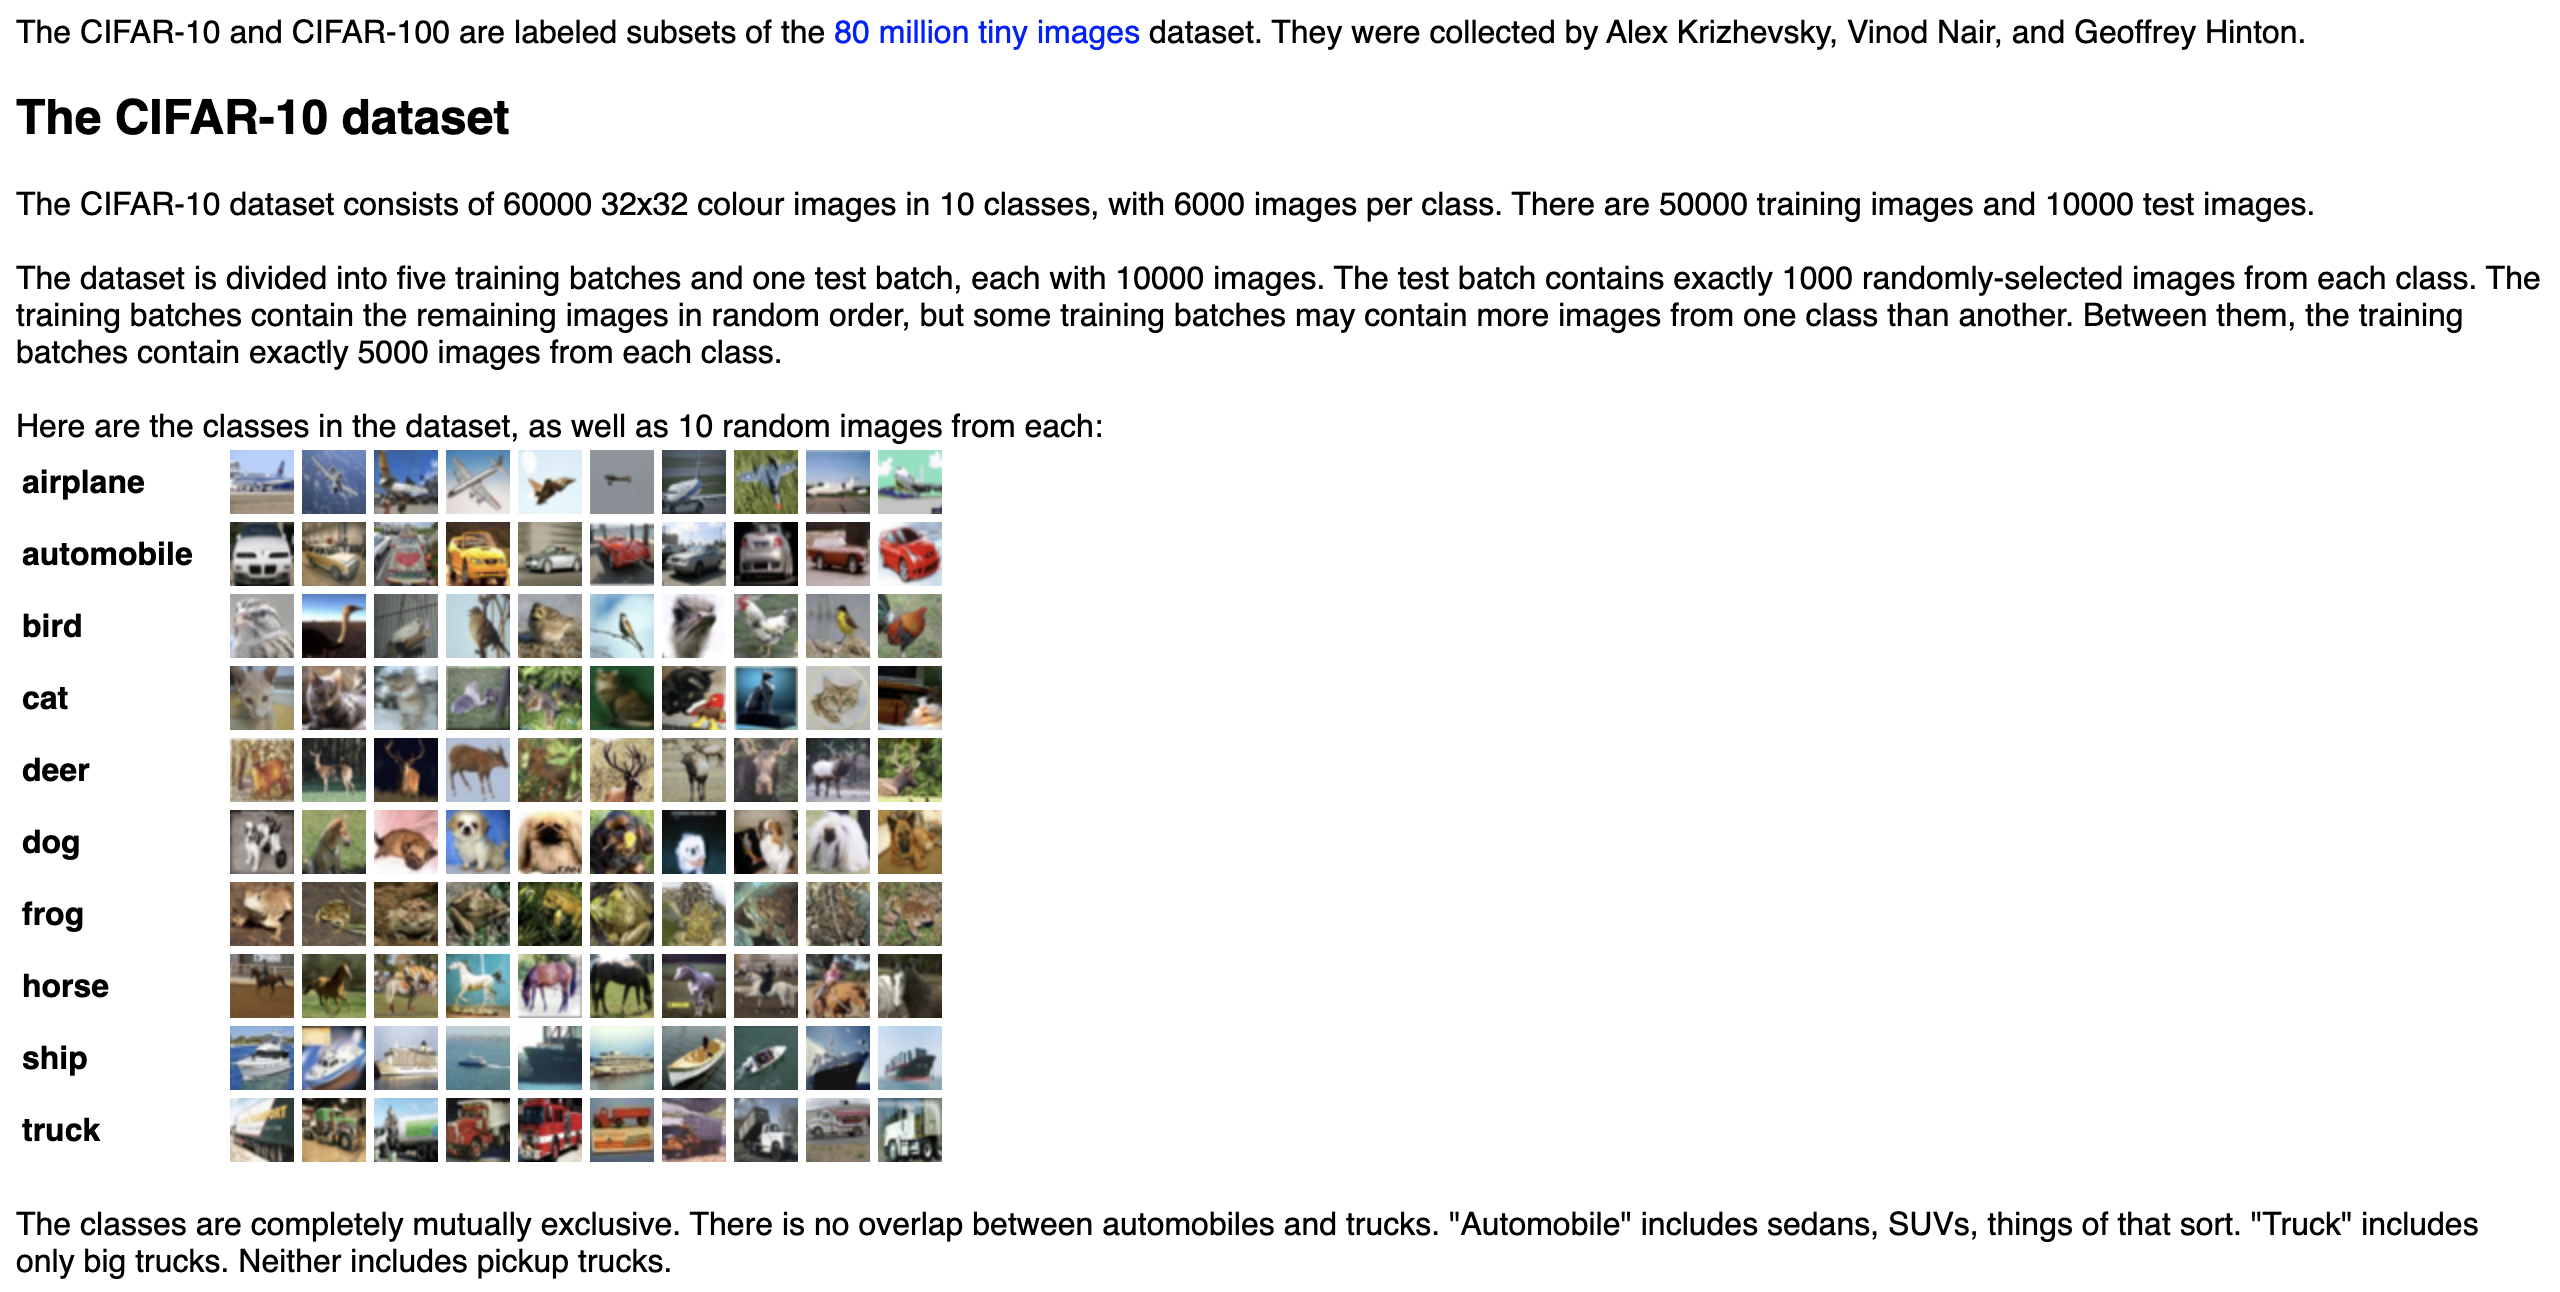

In [2]:
(Train_images, Train_labels), (Test_images, Test_labels) = keras.datasets.cifar10.load_data()

In [3]:
print ('train_images shape:',Train_images.shape)
print ('test_images shape:',Test_images.shape)
print ('train_labels shape:',Train_labels.shape)
print ('test_labels shape:',Test_labels.shape)

train_images shape: (50000, 32, 32, 3)
test_images shape: (10000, 32, 32, 3)
train_labels shape: (50000, 1)
test_labels shape: (10000, 1)


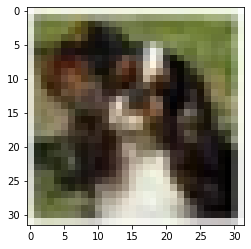

In [6]:
plt.imshow(Train_images[500])

In [7]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
validation_images, validation_labels = Train_images[:50], Train_labels[:50]
train_images, train_labels = Train_images[150:200], Train_labels[150:200]
test_images,test_labels = Test_images[:50],Test_labels[:50]

In [9]:
print ('train_images shape:',train_images.shape)
print ('validation_images shape:',validation_images.shape)
print ('test_images shape:',test_images.shape)
print ('train_labels shape:',train_labels.shape)
print ('validation_labels shape:',validation_labels.shape)
print ('test_labels shape:',test_labels.shape)

train_images shape: (50, 32, 32, 3)
validation_images shape: (50, 32, 32, 3)
test_images shape: (50, 32, 32, 3)
train_labels shape: (50, 1)
validation_labels shape: (50, 1)
test_labels shape: (50, 1)


In [10]:
# tensor slices creates dataset with separate element for each row of the input tensor
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))


2024-04-17 15:36:30.927295: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
print ([x for x in train_ds])

[(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 66,  37,  25],
        [ 75,  47,  32],
        [ 84,  56,  39],
        ...,
        [ 69,  51,  43],
        [104,  87,  73],
        [102,  86,  72]],

       [[ 72,  62,  50],
        [ 70,  61,  46],
        [116, 107,  90],
        ...,
        [ 86,  73,  68],
        [153, 141, 130],
        [148, 137, 125]],

       [[ 86,  85,  75],
        [ 79,  77,  66],
        [145, 144, 130],
        ...,
        [ 85,  77,  74],
        [156, 150, 141],
        [151, 146, 135]],

       ...,

       [[123, 131, 118],
        [124, 132, 119],
        [130, 138, 125],
        ...,
        [144, 153, 139],
        [151, 162, 148],
        [186, 197, 185]],

       [[134, 142, 129],
        [135, 143, 130],
        [140, 148, 135],
        ...,
        [144, 152, 139],
        [169, 178, 164],
        [224, 232, 222]],

       [[130, 138, 125],
        [132, 139, 127],
        [137, 145, 132],
        ...,
        [149, 156, 14

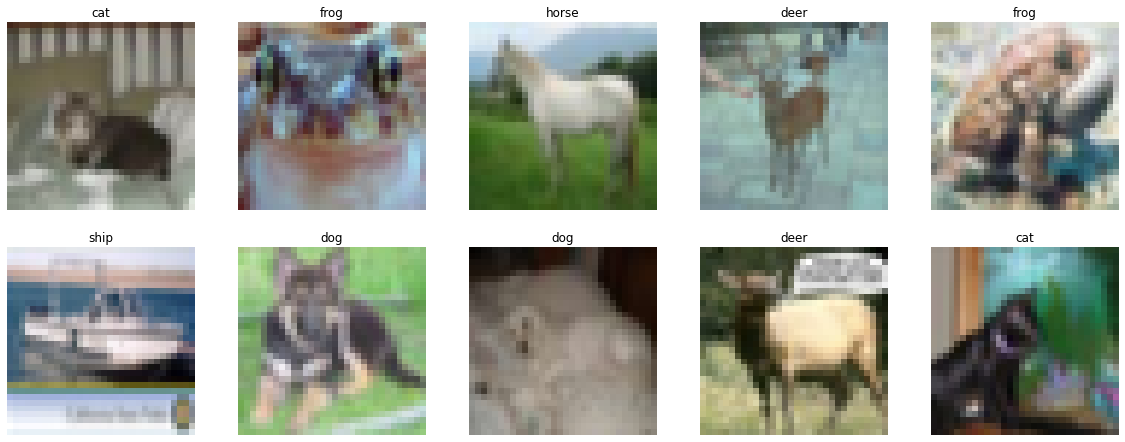

In [12]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(10)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [13]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 227x227 as per the need of ALEXNET
    image = tf.image.resize(image, (227,227))
    return image, label


In [14]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 50
Test data size: 50
Validation data size: 50


In [15]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size) # takes train_ds_size buffer and randomly creates a series of train images
                  .batch(batch_size=20, drop_remainder=True)) # out of 50 images, setting 20 images in the first batch
                                                              # drop_remainder = True implies full elements only
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=20, drop_remainder=True))

validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=20, drop_remainder=True))

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [18]:
model_history=model.fit(train_ds,
          epochs=100,
          validation_data=validation_ds,
          validation_freq=1) # validation every 1 epoch because frequency is 1

Epoch 1/100


2024-04-17 15:43:07.208219: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


2/2 [==============================] - 2s 1s/step - loss: 5.5393 - accuracy: 0.1333 - val_loss: 5.6917 - val_accuracy: 0.1000
Epoch 2/100
2/2 [==============================] - 2s 931ms/step - loss: 4.2533 - accuracy: 0.2667 - val_loss: 5.4785 - val_accuracy: 0.0250
Epoch 3/100
2/2 [==============================] - 2s 928ms/step - loss: 4.0021 - accuracy: 0.1667 - val_loss: 3.4202 - val_accuracy: 0.0250
Epoch 4/100
2/2 [==============================] - 2s 921ms/step - loss: 3.8707 - accuracy: 0.2500 - val_loss: 4.1336 - val_accuracy: 0.0250
Epoch 5/100
2/2 [==============================] - 2s 915ms/step - loss: 3.7926 - accuracy: 0.2000 - val_loss: 4.3477 - val_accuracy: 0.1000
Epoch 6/100
2/2 [==============================] - 2s 924ms/step - loss: 3.5833 - accuracy: 0.2167 - val_loss: 3.8405 - val_accuracy: 0.0500
Epoch 7/100
2/2 [==============================] - 2s 931ms/step - loss: 2.7738 - accuracy: 0.3667 - val_loss: 4.6956 - val_accuracy: 0.0500
Epoch 8/100
2/2 [===========

2/2 [==============================] - 2s 1s/step - loss: 0.1018 - accuracy: 0.9500 - val_loss: 2.7379 - val_accuracy: 0.1000
Epoch 60/100
2/2 [==============================] - 2s 1s/step - loss: 0.0933 - accuracy: 0.9833 - val_loss: 2.5526 - val_accuracy: 0.1250
Epoch 61/100
2/2 [==============================] - 2s 1s/step - loss: 0.0916 - accuracy: 0.9000 - val_loss: 2.7918 - val_accuracy: 0.1500
Epoch 62/100
2/2 [==============================] - 2s 1s/step - loss: 0.0404 - accuracy: 0.9667 - val_loss: 2.6544 - val_accuracy: 0.1250
Epoch 63/100
2/2 [==============================] - 2s 1s/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 2.5895 - val_accuracy: 0.1000
Epoch 64/100
2/2 [==============================] - 2s 1s/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 2.8570 - val_accuracy: 0.1250
Epoch 65/100
2/2 [==============================] - 2s 1s/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 2.7747 - val_accuracy: 0.1250
Epoch 66/100
2/2 [======================

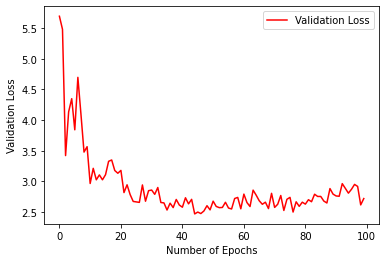

In [19]:
plt.plot(model_history.history['val_loss'], color='r', label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

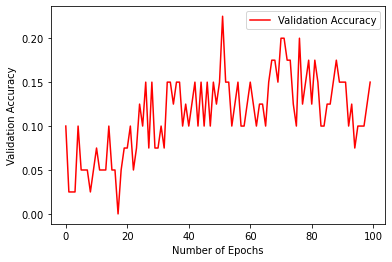

In [20]:
plt.plot(model_history.history['val_accuracy'], color='r', label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

<AxesSubplot:>

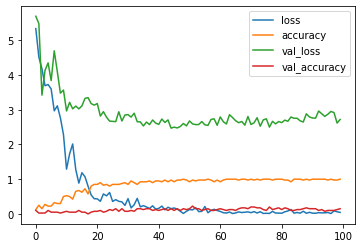

In [21]:
import pandas as pd
pd.DataFrame(model_history.history).plot()

In [22]:
score = model.evaluate(validation_ds)

2/2 [==============================] - 0s 130ms/step - loss: 2.7378 - accuracy: 0.1500


In [23]:
score # validation loss and validation accuracy

[2.7378170490264893, 0.15000000596046448]

In [24]:
y_pred = model.predict(test_ds)

In [25]:
print (y_pred)

[[6.52050925e-03 1.25189140e-01 4.41607758e-02 6.30887076e-02
  4.67968360e-02 1.17240369e-01 4.30905193e-01 9.08806920e-02
  4.32206504e-03 7.08956420e-02]
 [2.49025039e-02 8.39369446e-02 1.87735960e-01 8.67718458e-02
  2.27229655e-01 1.35501429e-01 7.89768994e-02 4.14918363e-02
  7.49062374e-02 5.85467070e-02]
 [4.14985307e-02 2.13270858e-01 5.73938079e-02 5.58752492e-02
  1.06737711e-01 8.89171958e-02 7.86200166e-02 1.54312223e-01
  1.72162279e-01 3.12121417e-02]
 [4.80988435e-02 9.69961211e-02 3.46510969e-02 1.22774318e-01
  1.85224831e-01 5.22904284e-02 2.23780900e-01 1.51337862e-01
  3.80515307e-02 4.67940867e-02]
 [1.00214351e-02 4.05776501e-02 1.41987856e-02 2.96933465e-02
  2.48943344e-02 7.34965563e-01 1.14843296e-02 6.53912574e-02
  4.17827703e-02 2.69905496e-02]
 [2.75197644e-02 1.66833520e-01 2.03186125e-02 1.05857905e-02
  5.41982390e-02 1.35952502e-01 1.51982373e-02 1.04697466e-01
  4.17406976e-01 4.72889356e-02]
 [2.09678560e-02 5.43282777e-02 1.02027571e-02 3.63409929e

In [26]:
y_pred = np.argmax(y_pred,axis = 1) 

In [27]:
print (y_pred)

[6 4 1 6 5 8 5 7 4 7 0 7 7 8 8 6 5 7 3 1 6 0 5 5 5 2 7 5 2 4 7 8 8 5 7 8 1
 7 5 7]


In [28]:
print (CLASS_NAMES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


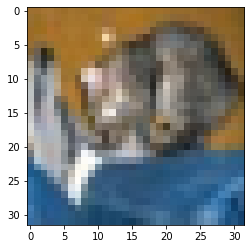

In [29]:
plt.imshow(Test_images[0])